In [73]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [74]:
mydata=pd.read_csv('loan.csv',low_memory=False)

In [75]:
mydata.shape

(39717, 111)

In [76]:
pd.options.display.max_rows = 150
mydata.isnull().sum().loc[mydata.isnull().sum()>0]

emp_title                          2459
emp_length                         1075
desc                              12940
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


# Cleaning the Dataset:

In [77]:
# Deleting columns having more than 2500 missing values
mydata = mydata.loc[:, (mydata.isnull().sum(axis=0) <= 2500)]

In [78]:
# Dropping rows with null values
mydata = mydata.dropna(subset=['pub_rec_bankruptcies','emp_length','revol_util','last_pymnt_d','last_credit_pull_d'])

In [79]:
# deleting not required columns
mydata = mydata.drop(['member_id', 'id', 'url', 'funded_amnt', 'funded_amnt_inv', 'emp_title', 'title', 'acc_now_delinq', 'delinq_amnt', 'application_type',
            'policy_code', 'pymnt_plan', 'zip_code', 'initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med'], axis=1)

In [80]:
mydata.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pu

In [81]:
print('Before: '+str(mydata.term.unique()))
mydata['term'] = mydata['term'].str.replace(r' months', '').astype(np.int64)
print('After: '+str(mydata.term.unique()))

Before: [' 36 months' ' 60 months']
After: [36 60]


In [82]:
print('Before unique: '+str(mydata.int_rate.unique()[0:5]))
mydata['int_rate'] = mydata['int_rate'].str.rstrip('%').astype(np.float64)
print('After unique: '+str(mydata.int_rate.unique()[0:5]))

Before unique: ['10.65%' '15.27%' '15.96%' '13.49%' '12.69%']
After unique: [10.65 15.27 15.96 13.49 12.69]


In [83]:
print('Before: '+str(mydata.revol_util.unique()[0:5]))
mydata['revol_util'] = mydata['revol_util'].str.rstrip('%').astype(np.float64)
print('After: '+str(mydata.revol_util.unique()[0:5]))

Before: ['83.70%' '9.40%' '98.50%' '21%' '53.90%']
After: [83.7  9.4 98.5 21.  53.9]


In [84]:
mydata['emp_length'][mydata['emp_length'] == '< 1 year'] = '0'
mydata['emp_length']=mydata.emp_length.str.extract('(\d+)').astype(np.int64)

In [85]:
mydata['issue_d'] = pd.to_datetime(mydata['issue_d'], format='%b-%y')
mydata['earliest_cr_line'] = pd.to_datetime(mydata['earliest_cr_line'], format='%b-%y')
mydata['last_pymnt_d'] = pd.to_datetime(mydata['last_pymnt_d'], format='%b-%y')
mydata['last_credit_pull_d'] = pd.to_datetime(mydata['last_credit_pull_d'], format='%b-%y')

mydata['issue_d_month']=mydata['issue_d'].dt.month
mydata['issue_d_year']=mydata['issue_d'].dt.year
mydata['earliest_cr_line_month']=mydata['earliest_cr_line'].dt.month
mydata['earliest_cr_line_year']=mydata['earliest_cr_line'].dt.year
mydata['last_pymnt_d_month']=mydata['last_pymnt_d'].dt.month
mydata['last_pymnt_d_year']=mydata['last_pymnt_d'].dt.year
mydata['earliest_cr_line_month']=mydata['last_credit_pull_d'].dt.month
mydata['earliest_cr_line_year']=mydata['last_credit_pull_d'].dt.year

In [86]:
# dropping date not required columns
mydata=mydata.drop(['issue_d', 'last_credit_pull_d','last_pymnt_d','earliest_cr_line'], axis = 1)

In [87]:
# check unique values
mydata.nunique().sort_values()

term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 4
pub_rec                        5
issue_d_year                   5
grade                          7
inq_last_6mths                 9
last_pymnt_d_year              9
earliest_cr_line_year         10
delinq_2yrs                   11
emp_length                    11
earliest_cr_line_month        12
last_pymnt_d_month            12
issue_d_month                 12
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
total_acc                     81
int_rate                     337
loan_amnt                    869
revol_util                  1087
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1274
collection_recovery_fee     2488
dti                         2863
recoveries                  3780
annual_inc

In [88]:
# Changing datatypes of all categorical columns
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state',
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
mydata[columns] = mydata[columns].astype('category')

In [89]:
# check data
pd.set_option('display.max_columns', 50)
mydata.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,12,2011,5,2016,1,2015
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,12,2011,9,2013,4,2013
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,12,2011,5,2016,6,2014
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,12,2011,4,2016,1,2015
4,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,12,2011,5,2016,5,2016


In [90]:
# Saving cleaned dataset
mydata.to_csv(r'loan\loan_cleaned.csv',index=False)

# Analysing the Dataset for Defaulters/Charged Off:

Fully Paid     31534
Charged Off     5203
Current         1098
Name: loan_status, dtype: int64


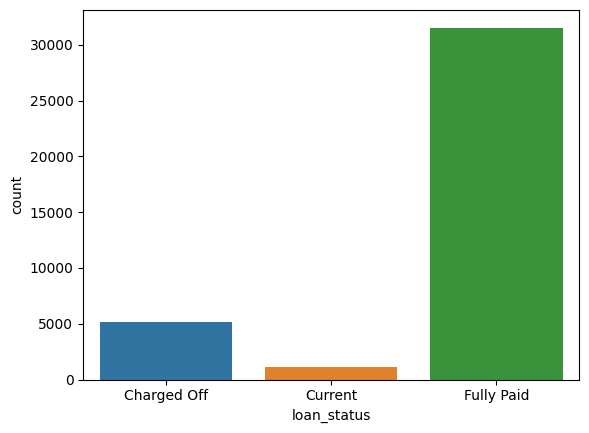

In [91]:
# checking Loan_status count
print(mydata['loan_status'].value_counts())
ax = sns.countplot(x='loan_status', data=mydata)

<Axes: xlabel='loan_amnt', ylabel='Density'>

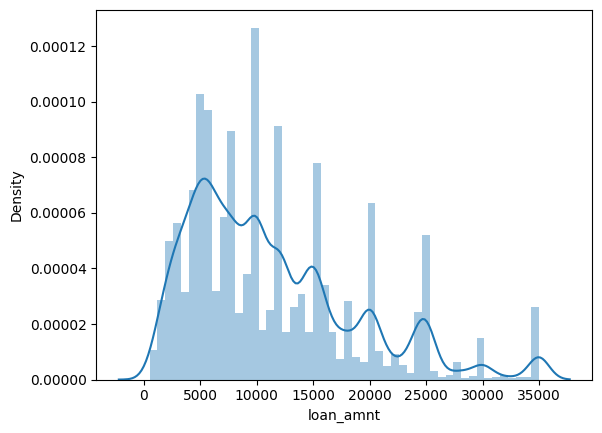

In [92]:
sns.distplot(mydata['loan_amnt'])

In [93]:
mydata.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5203.0,12296.290602,8096.922633,1000.0,6000.0,10000.0,17000.0,35000.0
Current,1098.0,17182.604736,8646.645299,1000.0,12000.0,16000.0,23312.5,35000.0
Fully Paid,31534.0,10964.766601,7223.862728,500.0,5500.0,9600.0,15000.0,35000.0


<Axes: xlabel='loan_amnt', ylabel='loan_status'>

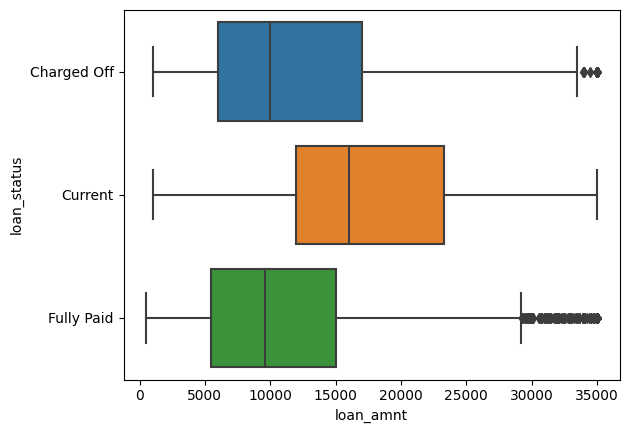

In [94]:
sns.boxplot(y='loan_status',x='loan_amnt',data=mydata)

<Axes: xlabel='emp_length', ylabel='count'>

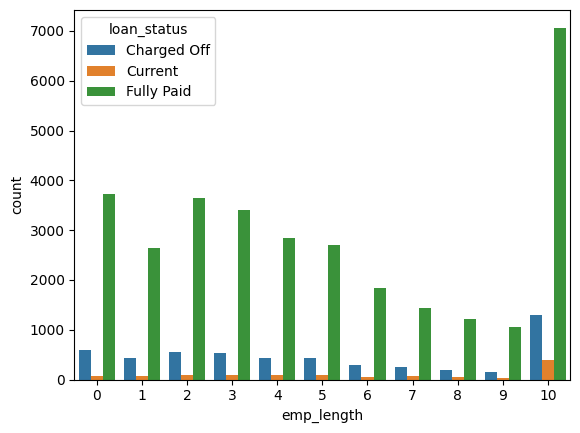

In [95]:
sns.countplot(x='emp_length', hue='loan_status', data=mydata)

<Axes: xlabel='loan_status', ylabel='int_rate'>

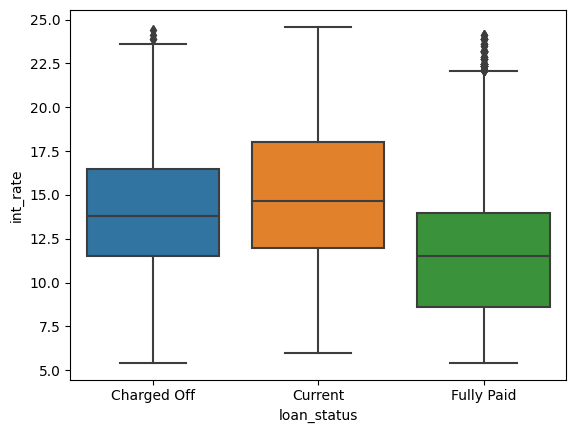

In [96]:
sns.boxplot(y='int_rate', x='loan_status', data=mydata)

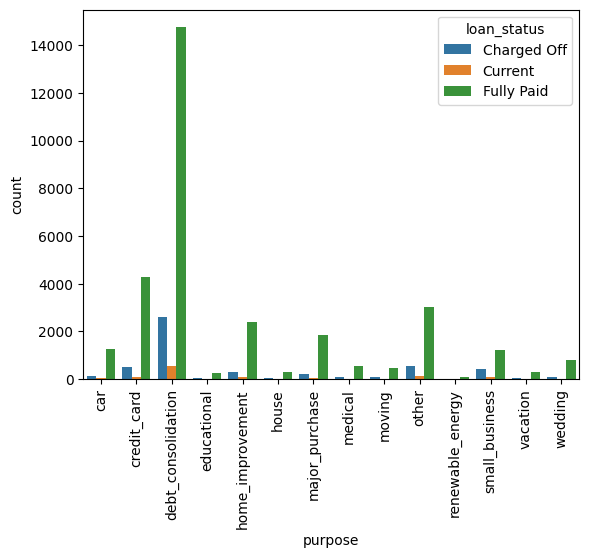

In [97]:
sns.countplot(x='purpose', hue="loan_status", data=mydata)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='term', ylabel='count'>

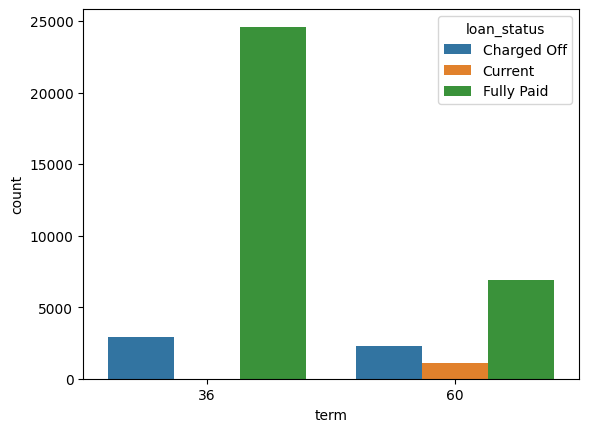

In [98]:
sns.countplot( x="term", hue='loan_status', data=mydata)

<Axes: xlabel='home_ownership', ylabel='count'>

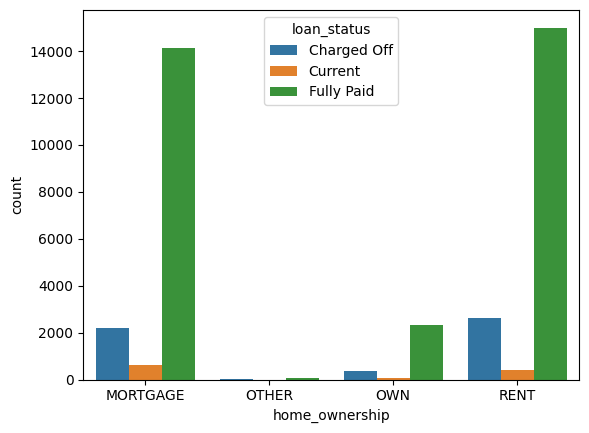

In [99]:
sns.countplot(x='home_ownership',hue='loan_status', data=mydata)

<Axes: >

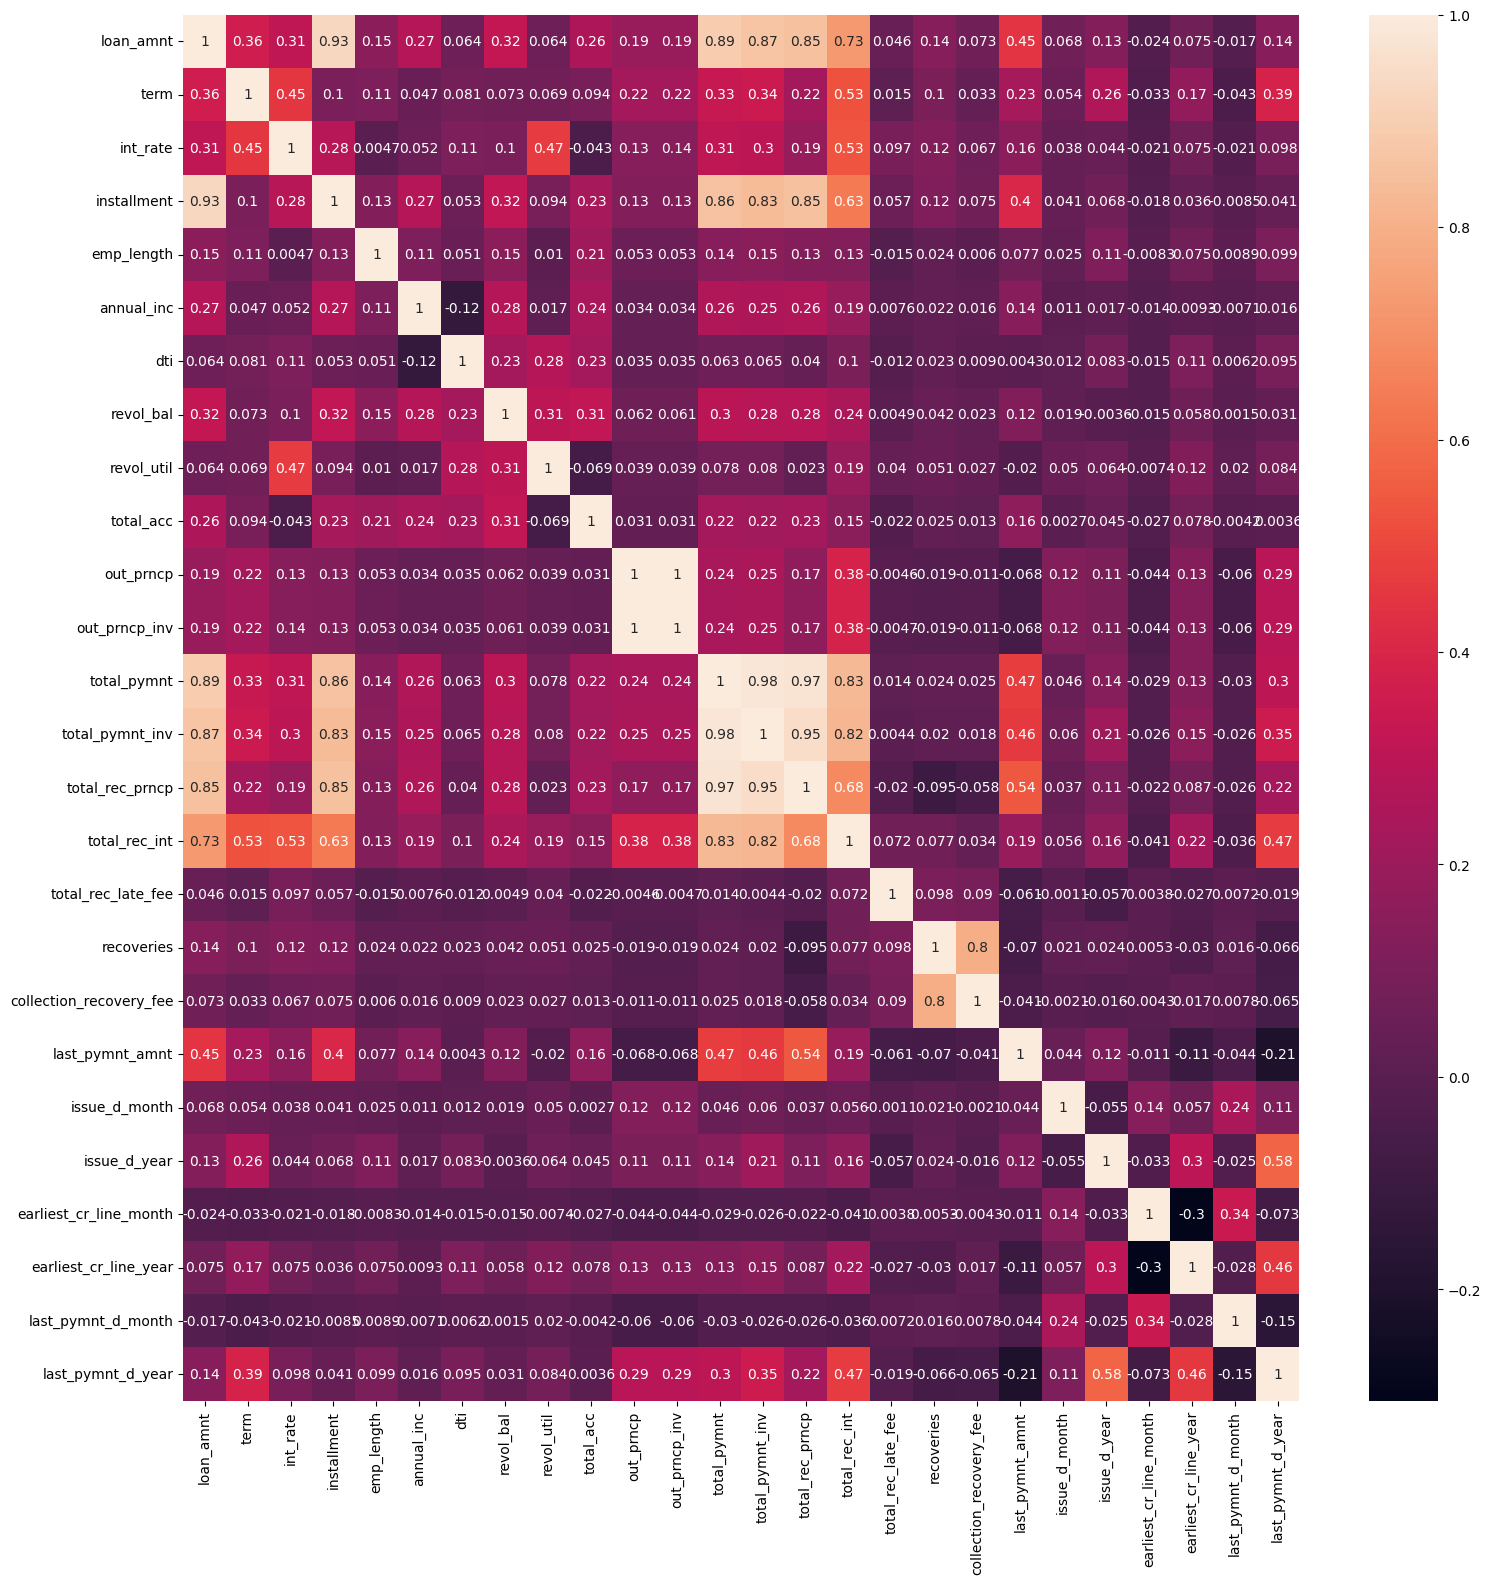

In [100]:
plt.figure(figsize=(18,18))
sns.heatmap(mydata.corr(),annot=True)

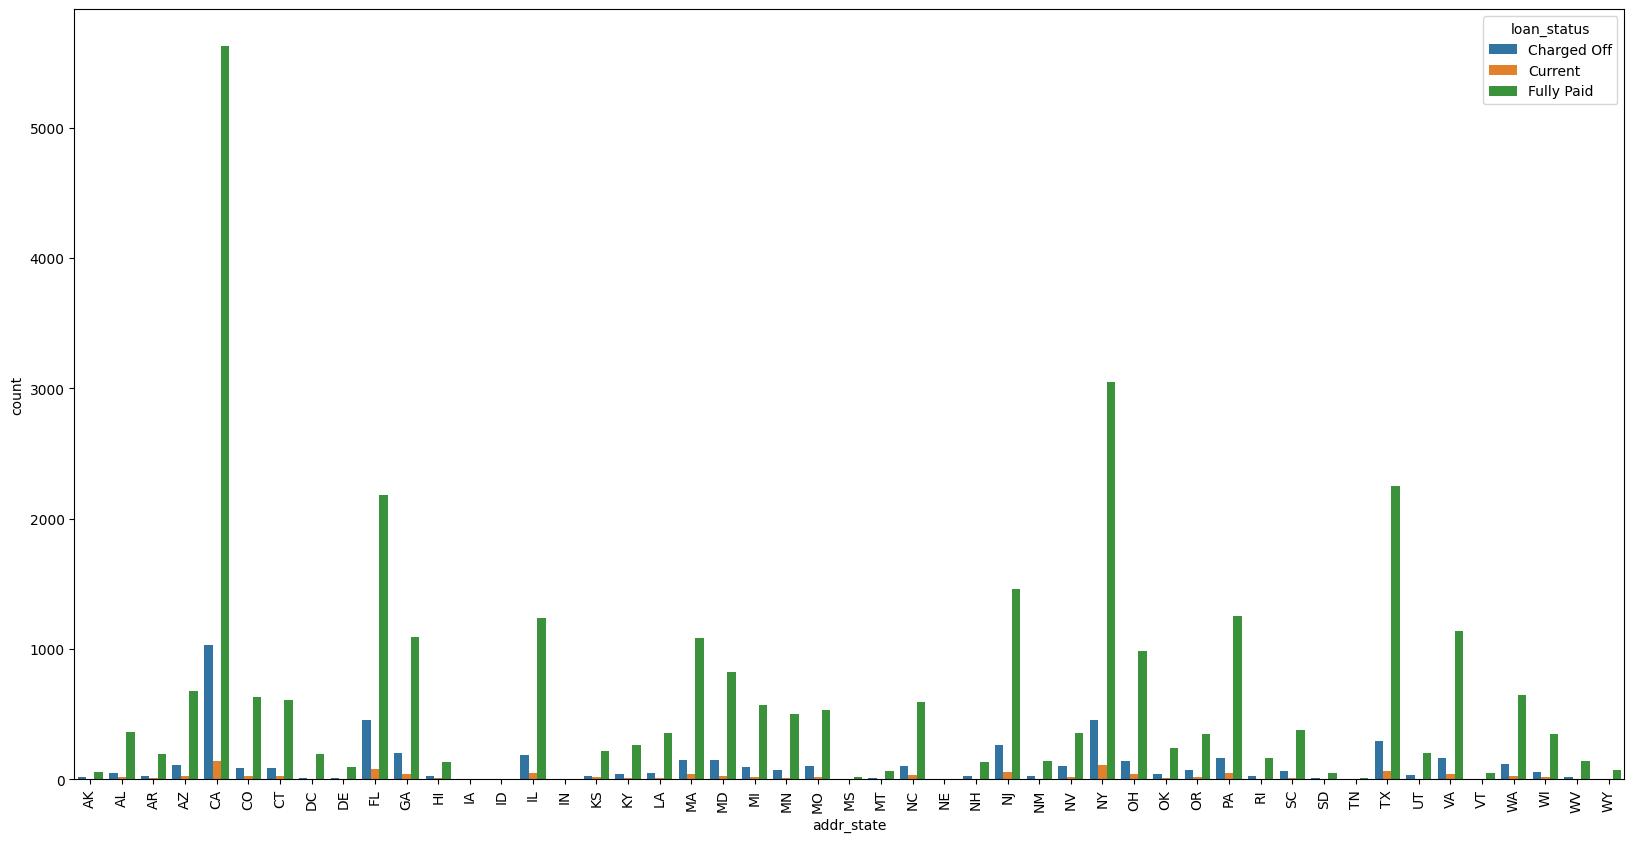

In [101]:
plt.figure(figsize=(20,10))
sns.countplot(hue='loan_status',x='addr_state',data=mydata)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='issue_d_year', ylabel='count'>

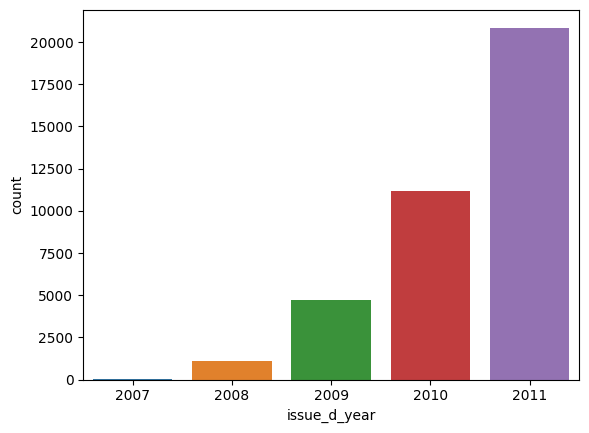

In [102]:
sns.countplot(x='issue_d_year', data=mydata)

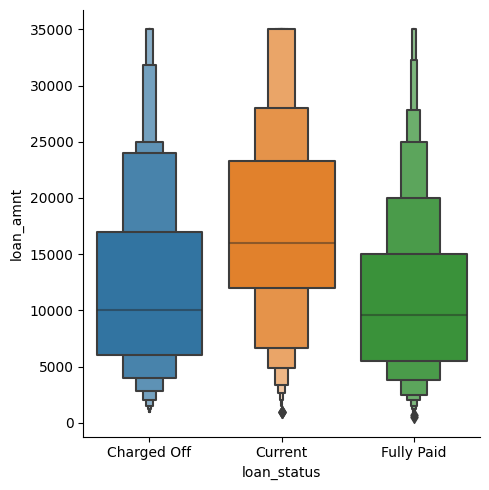

In [103]:
sns.catplot(y='loan_amnt',x='loan_status', kind='boxen', data=mydata)

<Axes: xlabel='term', ylabel='count'>

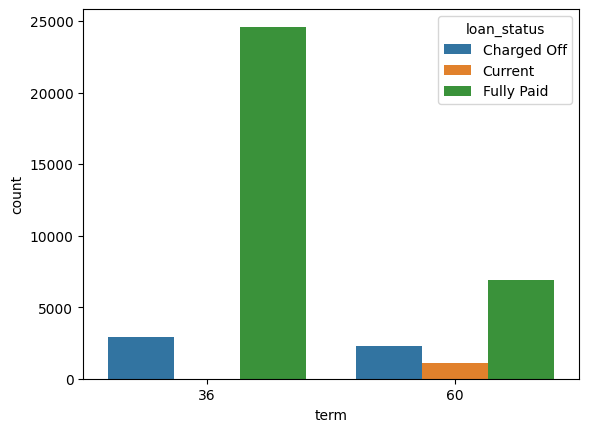

In [104]:
sns.countplot(x='term',data=mydata,hue='loan_status')

<Axes: xlabel='grade', ylabel='count'>

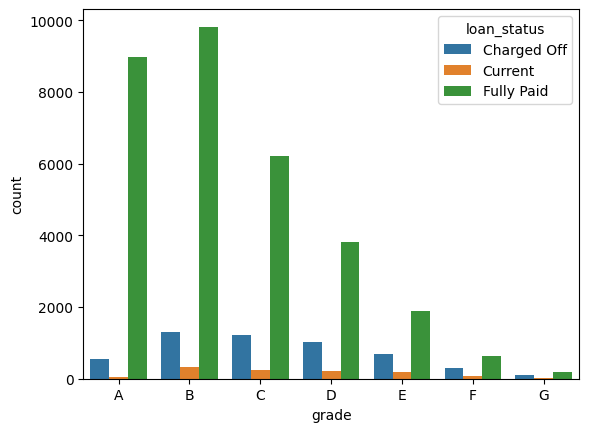

In [105]:
sns.countplot(x='grade',data=mydata,hue='loan_status')